In [1]:
import pandas as pd

In [2]:
data = {
    "age": [1, 1, 2, 3, 4, 5, 6, 60, 20],
    "size": [30, 27, 34, 45, 78, 80, 93, 150, 170]
}

df = pd.DataFrame(data)

In [3]:
df

,age,size
0,1,30
1,1,27
2,2,34
3,3,45
4,4,78
5,5,80
6,6,93
7,60,150
8,20,170


<AxesSubplot:xlabel='age', ylabel='size'>

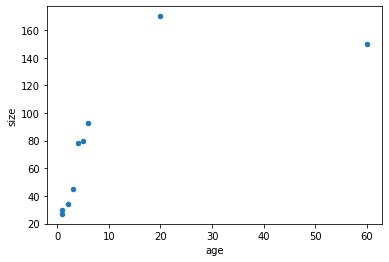

In [4]:
df.plot.scatter(x="age", y="size")

## Regression linéaire

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
regr = LinearRegression()

In [8]:
regr.fit(df[["age"]], df["size"])

LinearRegression()

In [14]:
regr.predict([[35], [150]])

array([126.25431426, 358.02997275])

In [15]:
regr.coef_

array([2.01544051])

In [16]:
regr.intercept_

55.71389645776567

In [17]:
# f(x) = 2.015 * x + 55.7

<AxesSubplot:>

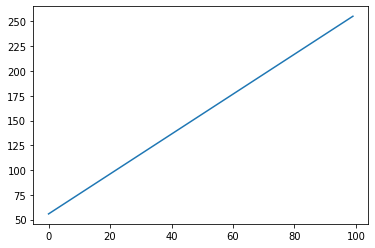

In [20]:
pd.Series(regr.predict([[i] for i in range(100)])).plot()

<AxesSubplot:xlabel='age', ylabel='size'>

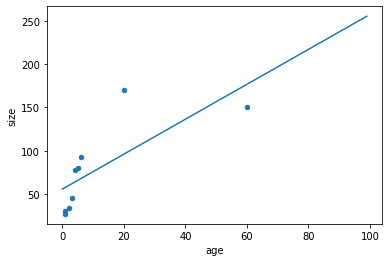

In [21]:
import matplotlib.pyplot as plt

ax = df.plot.scatter(x="age", y="size")
pd.Series(regr.predict([[i] for i in range(100)])).plot(ax=ax)

## Régression polynomiale

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [23]:
X = df[["age"]]
y = df["size"]

In [66]:
poly = PolynomialFeatures(degree=1)
X_ = poly.fit_transform(X)

In [67]:
X

,age
0,1
1,1
2,2
3,3
4,4
5,5
6,6
7,60
8,20


In [68]:
X_

array([[ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  4.],
       [ 1.,  5.],
       [ 1.,  6.],
       [ 1., 60.],
       [ 1., 20.]])

In [69]:
# f(x) = ax ^ 1 + b
#3 f(x) = a x ^ 3 + b x ^2 + c x ^1 + d

In [70]:
regr = linear_model.LinearRegression()
regr.fit(X_, y)

LinearRegression()

In [71]:
x = [[35], [150]]
x_ = poly.fit_transform(x)
regr.predict(x_)

array([126.25431426, 358.02997275])

<AxesSubplot:xlabel='age', ylabel='size'>

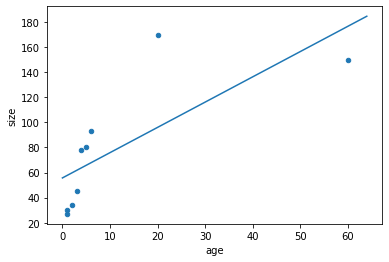

In [72]:
ax = df.plot.scatter(x="age", y="size")
pd.Series(regr.predict(poly.fit_transform([[i] for i in range(65)]))).plot(ax=ax)

## Regression logistique

In [157]:
df = pd.read_csv("prenoms.csv", sep=";")
df.dropna(subset=["prenom"], inplace=True)

In [158]:
df.head()

,prenom,genre,nb
0,Michel,M,14136
1,Alain,M,10646
2,Philippe,M,9903
3,Bernard,M,8992
4,Christian,M,8102


In [131]:
df["prenom"]

0           Michel
1            Alain
2         Philippe
3          Bernard
4        Christian
           ...    
12462    F.Jacques
12463       Frédie
12464       Efisia
12465       Cosima
12466     Florisse
Name: prenom, Length: 12467, dtype: object

In [173]:
def convert_prenom(s):
    output = pd.DataFrame()
    alphabet = "abcdefghijklmnopqrstuvwxyz-"
    
    for letter in alphabet:
        output[letter] = s.fillna("").str.lower().apply(lambda x: x.count(letter)).astype(int)
    
    return output

convert_prenom(df["prenom"])

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,-
0,0,0,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,1,2,0,0,1,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,1,2,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12462,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0
12463,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
12464,1,0,0,0,1,1,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
12465,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [194]:
from sklearn.linear_model import LogisticRegression

In [195]:
X = convert_prenom(df["prenom"])
Y = df["genre"]

In [196]:
regr = LogisticRegression()

In [197]:
regr.fit(X, Y)

LogisticRegression()

In [210]:
regr.predict(convert_prenom(pd.Series(["Alix"])))

array(['F'], dtype=object)

In [149]:
convert_prenom(pd.Series(["Christophe", "Mael", "Jacques", "Toto"]))

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,-
0,0,0,1,0,1,0,0,2,1,0,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,2,0,0,0,0,0,0,0


In [193]:
df.loc[df["prenom"].str.lower().apply(lambda x: "ophe" in x), "genre"] = "F"

In [192]:
df

,prenom,genre,nb
0,Michel,F,14136
1,Alain,M,10646
2,Philippe,M,9903
3,Bernard,M,8992
4,Christian,F,8102
...,...,...,...
12462,F.Jacques,M,1
12463,Frédie,F,1
12464,Efisia,F,1
12465,Cosima,F,1


In [204]:
regr.coef_

array([[-0.53547196,  0.81318123, -0.14021947,  0.57820656, -0.54271908,
         0.45568164,  0.45823139, -0.33323702, -0.37223537,  1.08176307,
         0.51498015,  0.012905  ,  0.13044053,  0.19075268,  0.20935371,
         1.044313  , -0.02719028,  0.36413361,  0.16225095,  0.05478045,
         0.50466867,  0.66372746,  0.63233981,  1.32231107, -0.30613918,
         0.0406829 ,  0.26823524]])